**Pinball loss**
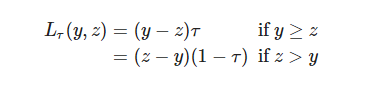

**Scaled pinball loss**
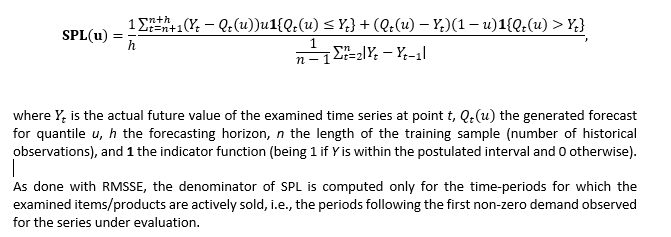

**Aggregated scaled pinball loss**
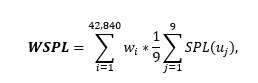

In [ ]:
import numpy as np

def quantile_spl(train_y, valid_y, quantile_preds, quantile):
    train_y = train_y.astype(np.float32)
    valid_y = valid_y.astype(np.float32)
    quantile_preds = quantile_preds.astype(np.float32)
    
    loss = (
        (
            (valid_y-quantile_preds)*(valid_y>=quantile_preds)*quantile
        )
        +
        (
            (quantile_preds-valid_y)*(quantile_preds>valid_y)*(1-quantile)
        )
    ).sum(axis=1)/quantile_preds.shape[1]
    scale = np.abs(np.diff(train_y)).mean(axis=1)

    spl = loss/scale
    # replace inf with nan so that all subsequent computations work
    spl[np.isinf(spl)] = np.nan
    return spl

In [ ]:
train_demand = np.array(
    [
        [10, 11, 10, 13, 9, 12, 10, 12, 13, 8, 14, 12],
        [11, 12, 11, 14, 10, 13, 11, 13, 14, 9, 15, 13],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
    ]
)

test_demand = np.array(
    [
        [10 , 11, 10, 13, 9, 12, 10, 12, 13, 8, 14, 12],
        [11 , 12, 11, 14, 10, 13, 11, 13, 14, 9, 15, 13],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]
)
p1_forecast = np.array(
    [
        [1, 2, 2, 3, 2, 1, 3, 4, 2, 1, 1, 3],
        [2, 3, 3, 2, 1, 2, 4, 5, 3, 2, 2, 4],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
    ]
)

p5_forecast  = np.array(
    [
        [11, 10, 12, 12, 12, 14, 11, 10, 10, 13, 12, 10 ],
        [12, 11, 13, 13, 13, 15, 12, 11, 11, 14, 13, 11 ],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

p9_forecast = np.array(
    [
        [21, 22, 22, 23, 22, 21, 23, 24, 22, 21, 21, 23],
        [22, 23, 24, 24, 23, 22, 24, 25, 23, 22, 22, 24],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
    ]
)

p1_spl = quantile_spl(train_demand, test_demand, p1_forecast, 0.1)
p5_spl = quantile_spl(train_demand, test_demand, p5_forecast, 0.5)
p9_spl = quantile_spl(train_demand, test_demand, p9_forecast, 0.9)

item_spls = np.nanmean(
    np.array(
        [
            p1_spl, p5_spl, p9_spl
        ]
    ),
    axis=0
)
print(item_spls)    

# This assumes equal weighting for each item
aggregated_spl = np.nanmean(
    item_spls
)
print(aggregated_spl)